# Sistema de Recomendação de Livros com Embeddings Semânticos (Sentence-BERT)

## Objetivo

Criar um sistema de recomendação de livros baseado em similaridade semântica entre descrições dos livros.


## Instalação de dependências

## Importações

In [9]:
import pandas as pd
import difflib
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


## Carregar o dataset

In [10]:
books_data = pd.read_csv('data.csv')  # Ajuste o caminho conforme necessário
books_data.fillna('', inplace=True)


C:\Users\Demet\AppData\Local\Temp\ipykernel_17264\1575114552.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  books_data.fillna('', inplace=True)


## Preparação dos textos para os embeddings

In [11]:
books_data['text_for_embedding'] = books_data['title'] + ' ' + books_data['description']
texts = books_data['text_for_embedding'].tolist()


## Gerar os embeddings com Sentence-BERT

In [12]:
model = SentenceTransformer('all-MiniLM-L6-v2')
book_embeddings = model.encode(texts, show_progress_bar=True)


Batches:   0%|          | 0/213 [00:00<?, ?it/s]

## Como o Sentence-BERT funciona 


Sentence-BERT transforma cada descrição de livro em um **vetor numérico de alta dimensão** (ex: 384 dimensões).

Cada posição do vetor representa uma característica semântica aprendida durante o treinamento do modelo.

Esse processo envolve **métodos numéricos avançados**, como:

- Multiplicação de matrizes

- Operações vetoriais

- Transformações não-lineares (ReLU, Softmax)

- Cálculo de gradientes durante o treinamento (não executado aqui, mas feito na criação do modelo)


## Função de recomendação baseada na Similaridade de Cosseno entre embeddings, que compara a direção desses vetores no espaço.

In [13]:
def recommend_books_semantic(book_name):
    list_of_all_titles = books_data['title'].tolist()
    find_close_match = difflib.get_close_matches(book_name, list_of_all_titles)
    
    if not find_close_match:
        print(f"Nenhuma correspondência próxima encontrada para '{book_name}'. Tente outro título.")
        return
    
    close_match = find_close_match[0]
    book_index = books_data[books_data.title == close_match].index[0]
    
    target_embedding = book_embeddings[book_index].reshape(1, -1)
    similarity_scores = cosine_similarity(target_embedding, book_embeddings)[0]
    
    similar_books = list(enumerate(similarity_scores))
    similar_books = sorted(similar_books, key=lambda x: x[1], reverse=True)
    
    print(f"Recomendações baseadas em '{close_match}' usando Sentence-BERT:\n")
    
    i = 1
    for book in similar_books:
        index = book[0]
        title_from_index = books_data.iloc[index]['title']
        if i <= 10 and index != book_index:
            print(f"{i}. {title_from_index} (Score: {book[1]:.4f})")
            i += 1


## Exemplo de uso

In [16]:
user_book = input('Digite o nome de um livro: ')
recommend_books_semantic(user_book)


Recomendações baseadas em 'Harry Potter' usando Sentence-BERT:

1. The Harry Potter Collection (Score: 0.9125)
2. Harry Potter and the Chamber of Secrets (Score: 0.5829)
3. Harry Potter and the Goblet of Fire (Score: 0.5597)
4. Ultimate Unofficial Guide to the Mysteries of Harry Potter (Score: 0.5423)
5. Harry Potter and Philosophy (Score: 0.4992)
6. Harry Potter and the Prisoner of Azkaban (Book 3) (Score: 0.4853)
7. Harry Potter and the Chamber of Secrets (Book 2) (Score: 0.4836)
8. Harry Potter and the Half-Blood Prince (Book 6) (Score: 0.4805)
9. Harry Potter and the Sorcerer's Stone (Book 1) (Score: 0.4718)
10. Unauthorized Harry Potter and the Deathly Hallows News (Score: 0.4695)


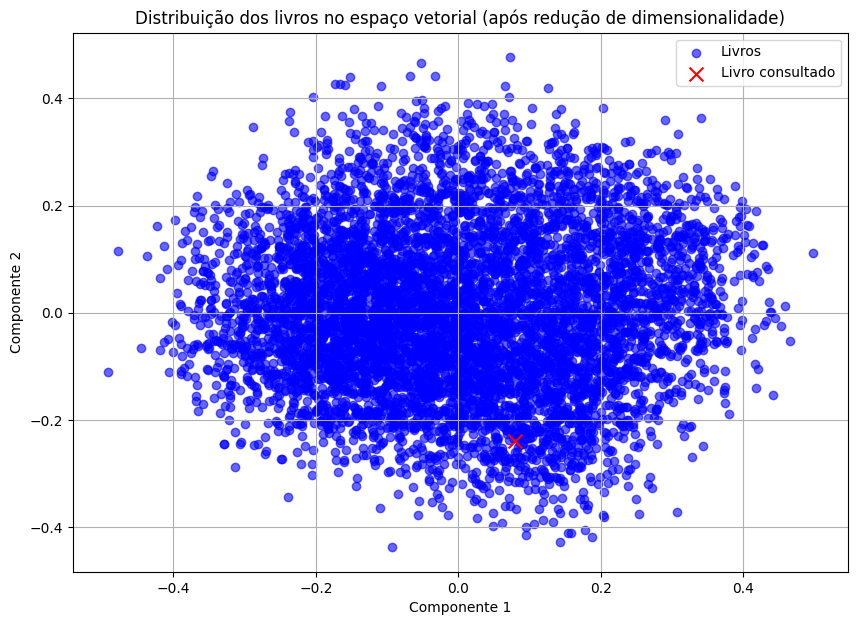

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzindo para 2 dimensões
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(book_embeddings)

# Plotando
plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.6, c='blue', label='Livros')

user_input = "Gravity"
user_embedding = model.encode([user_input])
user_embedding_reduced = pca.transform(user_embedding.reshape(1, -1))
plt.scatter(user_embedding_reduced[:, 0], user_embedding_reduced[:, 1], c='red', label='Livro consultado', marker='x', s=100)

plt.title('Distribuição dos livros no espaço vetorial (após redução de dimensionalidade)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()
